# Simple Linear Regression - closed-form math solution

Anuj Khandelwal (@anujonthemove)

I just completed Week 1 lectures of Coursera Machine Learning course which was on Linear Regression with One Variable. While the lectures are use gradient descent learning algorithm, I wanted to implement what I already knew about linear regression - the ***closed-form math solution***.

Simple linear regression or univariate linear regression or linear regression in one variable. <br>
** Linear model: **  $ y = \beta_0 + \beta_1x $

What does each term represent?
* $y$ is the response or dependent variable
* $x$ is the feature or independent variable
* $\beta_0$ is the intercept
* $\beta_1$ is the coefficient of x or slope of the regression line

**Objective: ** Find Least Squares Estimates of model parameters (β0 and β1) using the closed-form math solution. 

**Dataset: ** [Sweden Auto Insurance data](https://www.math.muni.cz/~kolacek/docs/frvs/M7222Q/data/AutoInsurSweden.txt)

**Task: ** Predict payment for auto insurance claims in Sweden. 

## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## 2. Utility functions

In [2]:
def split_data(data):
    return data.iloc[:, 0:1], data.iloc[:, 1:2]  

In [3]:
# calculation of model coefficients b0 and b1
def estimateCoefficients(x, y):
    
    m_x = np.mean(x)
    m_y = np.mean(y)
    
    # formula can be found at: http://www.public.iastate.edu/~alicia/stat328/Least%20Squares.pdf
    # for derivation for this formula, check the wikipedia link in reference section
    SSxy = np.sum((x-m_x)*(y-m_y)) # covariance of xy
    SSxx = np.sum(np.power((x-m_x), 2)) # variance of x
         
    b1 = SSxy / SSxx
    b0 = m_y - b1 * m_x
    
    return b0, b1

In [4]:
# Root-mean-squared-error metric / Error function
def rmse(actual, predicted):
    return np.sqrt(np.mean(np.sum(np.power(actual-predicted, 2)))) 

In [5]:
# function to predict values on test data
# a more optimized version would be the vectorized version
def predict(coeff, testData):
    y_pred = []
    for i in range(len(testData)):
        y_pred.append(coeff[0] + coeff[1]*testData[i])
    return y_pred

## 3. Load data
The data set contains two columns: 
* number of insurance claims (X)
* total payments against the claims in thousands of Swedish Kronor for geographical zones in Sweden (y)

In [6]:
data = pd.read_csv('../datasets/regression/univariate-regression/auto-insurance-data/auto-insurance-sweden.csv', sep=','
                 , names=['num_claims', 'total_payment'], skiprows=1)
print(data.head())

   num_claims  total_payment
0         108          392.5
1          19           46.2
2          13           15.7
3         124          422.2
4          40          119.4


## 4. Descriptive statistics

Given a dataset, a lot of things can be explored.
Here, I have explored the following:

* **count of rows and columns**
* **dataset description using pd.describe():** _"It generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values."_
* **box plot:** visualize descriptive statistics
* **scatter plot:** to see if a linear relatioship exists between X and y

### 4.a. Count of rows and columns

In [7]:
# rows and columns
rows, cols = data.shape
print("rows: {}".format(rows), "cols: {}".format(cols))

('rows: 63', 'cols: 2')


### 4.b. Dataset description using pd.describe()

In [8]:
data.describe()

,num_claims,total_payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


### 4.c. Box plot

#### Box plot - using matplotlib

In [9]:
# # Create a figure instance
# fig = plt.figure(1, figsize=(12, 10))

# # Create an axes instance
# ax = fig.add_subplot(111)

# # Create the boxplot
# bp = ax.boxplot(data.values, labels=['num_claims', 'total_payment'])

# # Save the figure, if needed
# # fig.savefig('fig1.png', bbox_inches='tight')

#### Box plot - using pandas

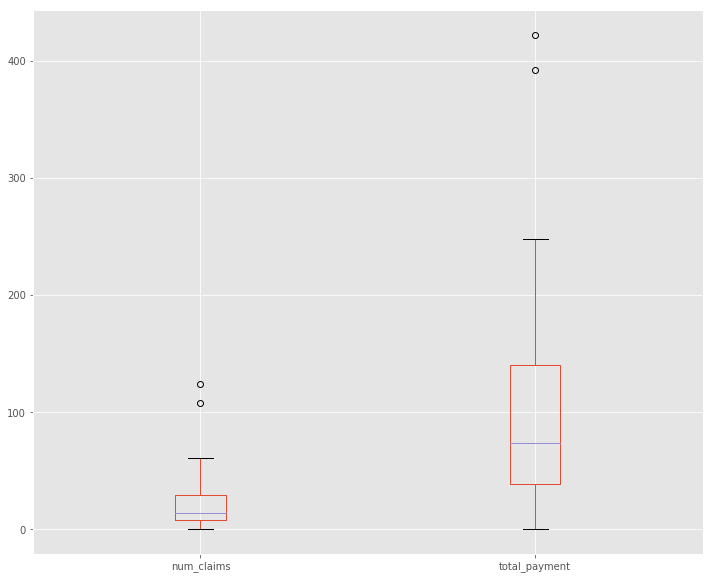

In [10]:
# pd.options.display.mpl_style = 'default'
data.boxplot(figsize=(12,10));

#### Box plot interpretation:

Pending

### 4.d. Split data
Split the data set into feature vector (X) and target vector (y)

In [11]:
X_df, y_df = split_data(data)

### 4.e. Scatter plot 
* this is an important step in linear regression. 
* it shows the relationship between dependent and independent variables

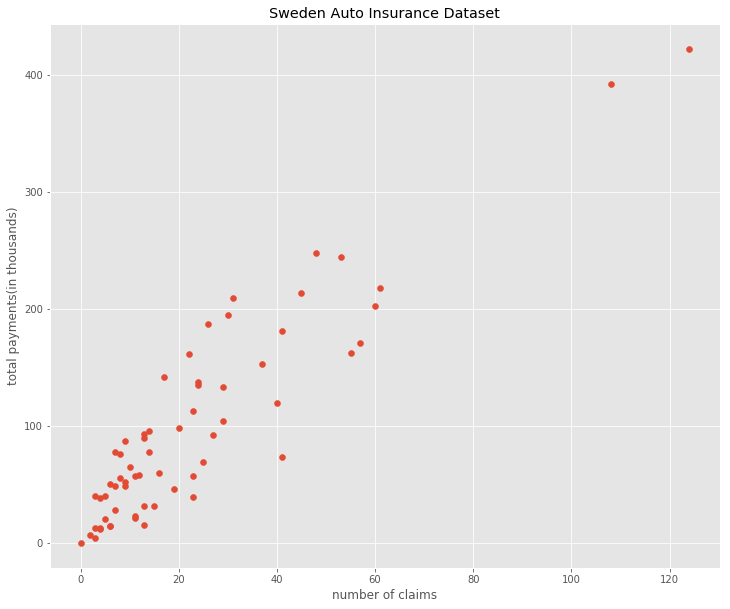

In [12]:
# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create scatterplot
ax.scatter(X_df, y_df)

# Set common labels
ax.set_xlabel('number of claims')
ax.set_ylabel('total payments(in thousands)')

ax.set_title('Sweden Auto Insurance Dataset');

# Save the figure, if needed
# fig.savefig('fig1.png', bbox_inches='tight')

## 5. Build model 

**Theory:** For linear model, the coefficients are estimated using the least squares criterion which means we find the best-fit line through the training data which minimizes the sum of squared residuals or "sum of squared errors".

**(Train)** Build a linear model i.e., estimate or learn model coefficients: $\beta_0$ and $\beta_1$

**(Predict)** Use the built model to predict total payments against the claims made. 

In [13]:
# X and y are Dataframe objects, converting them to numpy arrays for easier math
X = np.array(X_df)
y = np.array(y_df)

# split train and validation sets

# train data
X_train = X[:-5]
y_train = y[:-5]

# validation data: used to evaluate accuracy of the model
# Accuracy check is best done using cross-validation but since the data is very small, 
# I have indeed set aside a few observation from the training data to evaluate the model. 
# The error function or the evaluation function used here is Root Mean Squared error (RMSE).
X_val = X[-5:]
y_val = y[-5:]

In [14]:
# train linear model on part dataset (estimate coefficients)
coeff = estimateCoefficients(X_train, y_train)

## 6. Plotting least squares regression line
This shows how least square line (the coefficients for which we just estimated above) fits our data.

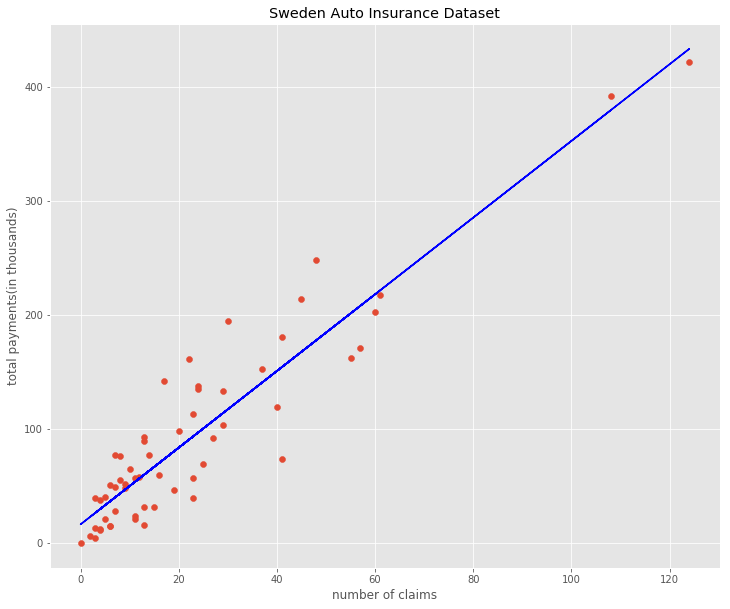

In [15]:
# Create a figure instance
fig = plt.figure(1, figsize=(12, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# predicted response vector
y_pred = coeff[0] + coeff[1]*X_train

# Create scatterplot
ax.scatter(X_train, y_train)
ax.plot(X_train, y_pred, color="b")

# Set common labels
ax.set_xlabel('number of claims')
ax.set_ylabel('total payments(in thousands)')
ax.set_title('Sweden Auto Insurance Dataset');

# Save the figure, if needed
# fig.savefig('fig1.png', bbox_inches='tight')

## 7. Root Mean Squared Error(RMSE)

In [16]:
# Root Mean Squared Error value
predictions = predict(coeff, X_val)
rmse_val = rmse(y_val, np.array(predictions))
print("RMSE value on test data: {}".format(rmse_val))

RMSE value on test data: 141.683636853


**Interpretation:**

It can be seen that RMSE value is large. It can be said that the model doesn't fit the data very well.

This can be attributed to the fact that we have a very small dataset(63 rows) for training.

## 8. Prediction
Using the equation: $y_{pred} = b[0] + b[1]x $, we can make predictions for total payements (y) given claims (x). 

Unseen, new data is used here.

In [17]:
# unseen test data set
X_test = [31, 14, 53, 26, 100, 120, 95, 200]

# make predictions on new data using the coefficients obtained above
y_pred = predict(coeff, X_test)
pd.DataFrame({'X_test': X_test, 'y_pred': y_pred})

,X_test,y_pred
0,31,120.749100
1,14,63.532681
2,53,194.793876
3,26,103.920741
4,100,352.980444
5,120,420.293878
6,95,336.152086
7,200,689.547611


## References:
1. http://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/
2. https://en.wikipedia.org/wiki/Simple_linear_regression
3. https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb